In [39]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

In [41]:
# import original image, get the size of the image
im_original = Image.open('Resource/sample.JPG')
(x, y) =im_original.size  # Get the width and hight of the image 

In [43]:
# get image data, reshape to list of pixels of RGB, and scale between 0 and 1
im_data = np.array(im_original.getdata())
im_data_transformed = im_data.reshape(x * y, int(im_data.size/x/y)) /255

In [44]:
# select 16 colors to represent all pixels
km = KMeans(
    n_clusters=16, init='random',
    n_init=10, max_iter=100, 
    tol=1e-04, random_state=0
)
km.fit_predict(im_data_transformed)
# km.labels_ as assigments for each pixel, km.clueter_centers_ as selected colors

array([ 1,  1,  1, ...,  7, 14,  0], dtype=int32)

In [45]:
# transform centroids to 255 scale
centroids = (km.cluster_centers_* 255).astype("uint8")

In [46]:
# fill each pixel with selected centroids
list_ = []
for label in km.labels_:
    list_.append(centroids[label])

In [47]:
# transform back to image shape, form image, save impage
list2 = np.reshape(list_,(y,x,int(im_data.size/x/y)))
im_compressed = Image.fromarray(list2, 'RGB')
im_compressed.save('KMeans/sample_PIL_compressed.JPG')

In [48]:
# show original and compressed images 
# im_original.show()
# im_compressed.show()

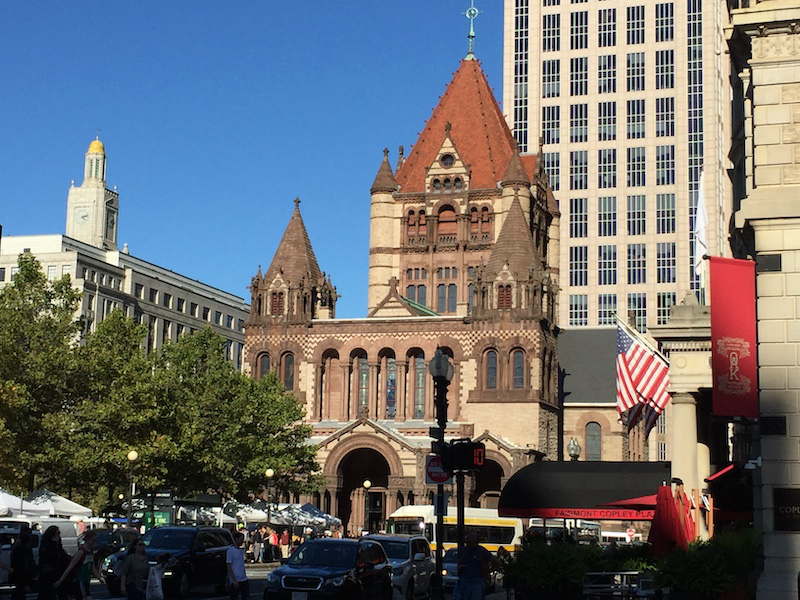

In [49]:
display(im_original)

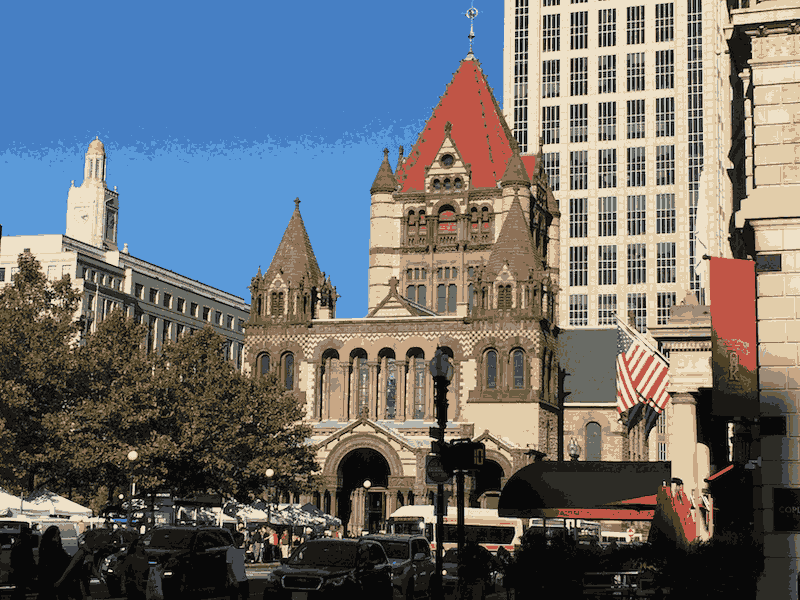

In [50]:
display(im_compressed)